# Trendline and high-level analysis at the bottom
## This notebook looks at the relationship between Ocean Temperature & Salinity
## This should be a quasi-linear relationship but the measured data shows an unexplained transistion between low Depth T vs S trends & high Depth T vs S trend

### Analysis was so far only complete for the year 1960, other years will be analyzed in the future.
### Analysis was primarily performed with Python scikit's Linear Regression model & Seaborn's visualization module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Data and look for simple relationship btwn Temp & Salinity

In [3]:
bottle = pd.read_csv("bottle.csv", encoding="utf-8")
#cast = pd.read_csv("cast.csv")
pd.set_option('display.max_columns', 100)

#clean data a bit
#only keep numeric values
numeric_cols = [];
for col in bottle:
    if(np.issubdtype(bottle[col].dtype, np.number)):
        numeric_cols.append(col)
    
good_bottle = bottle[numeric_cols];
bottle.head()


C:\Users\gotta\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get a Sample of data and look for correlations

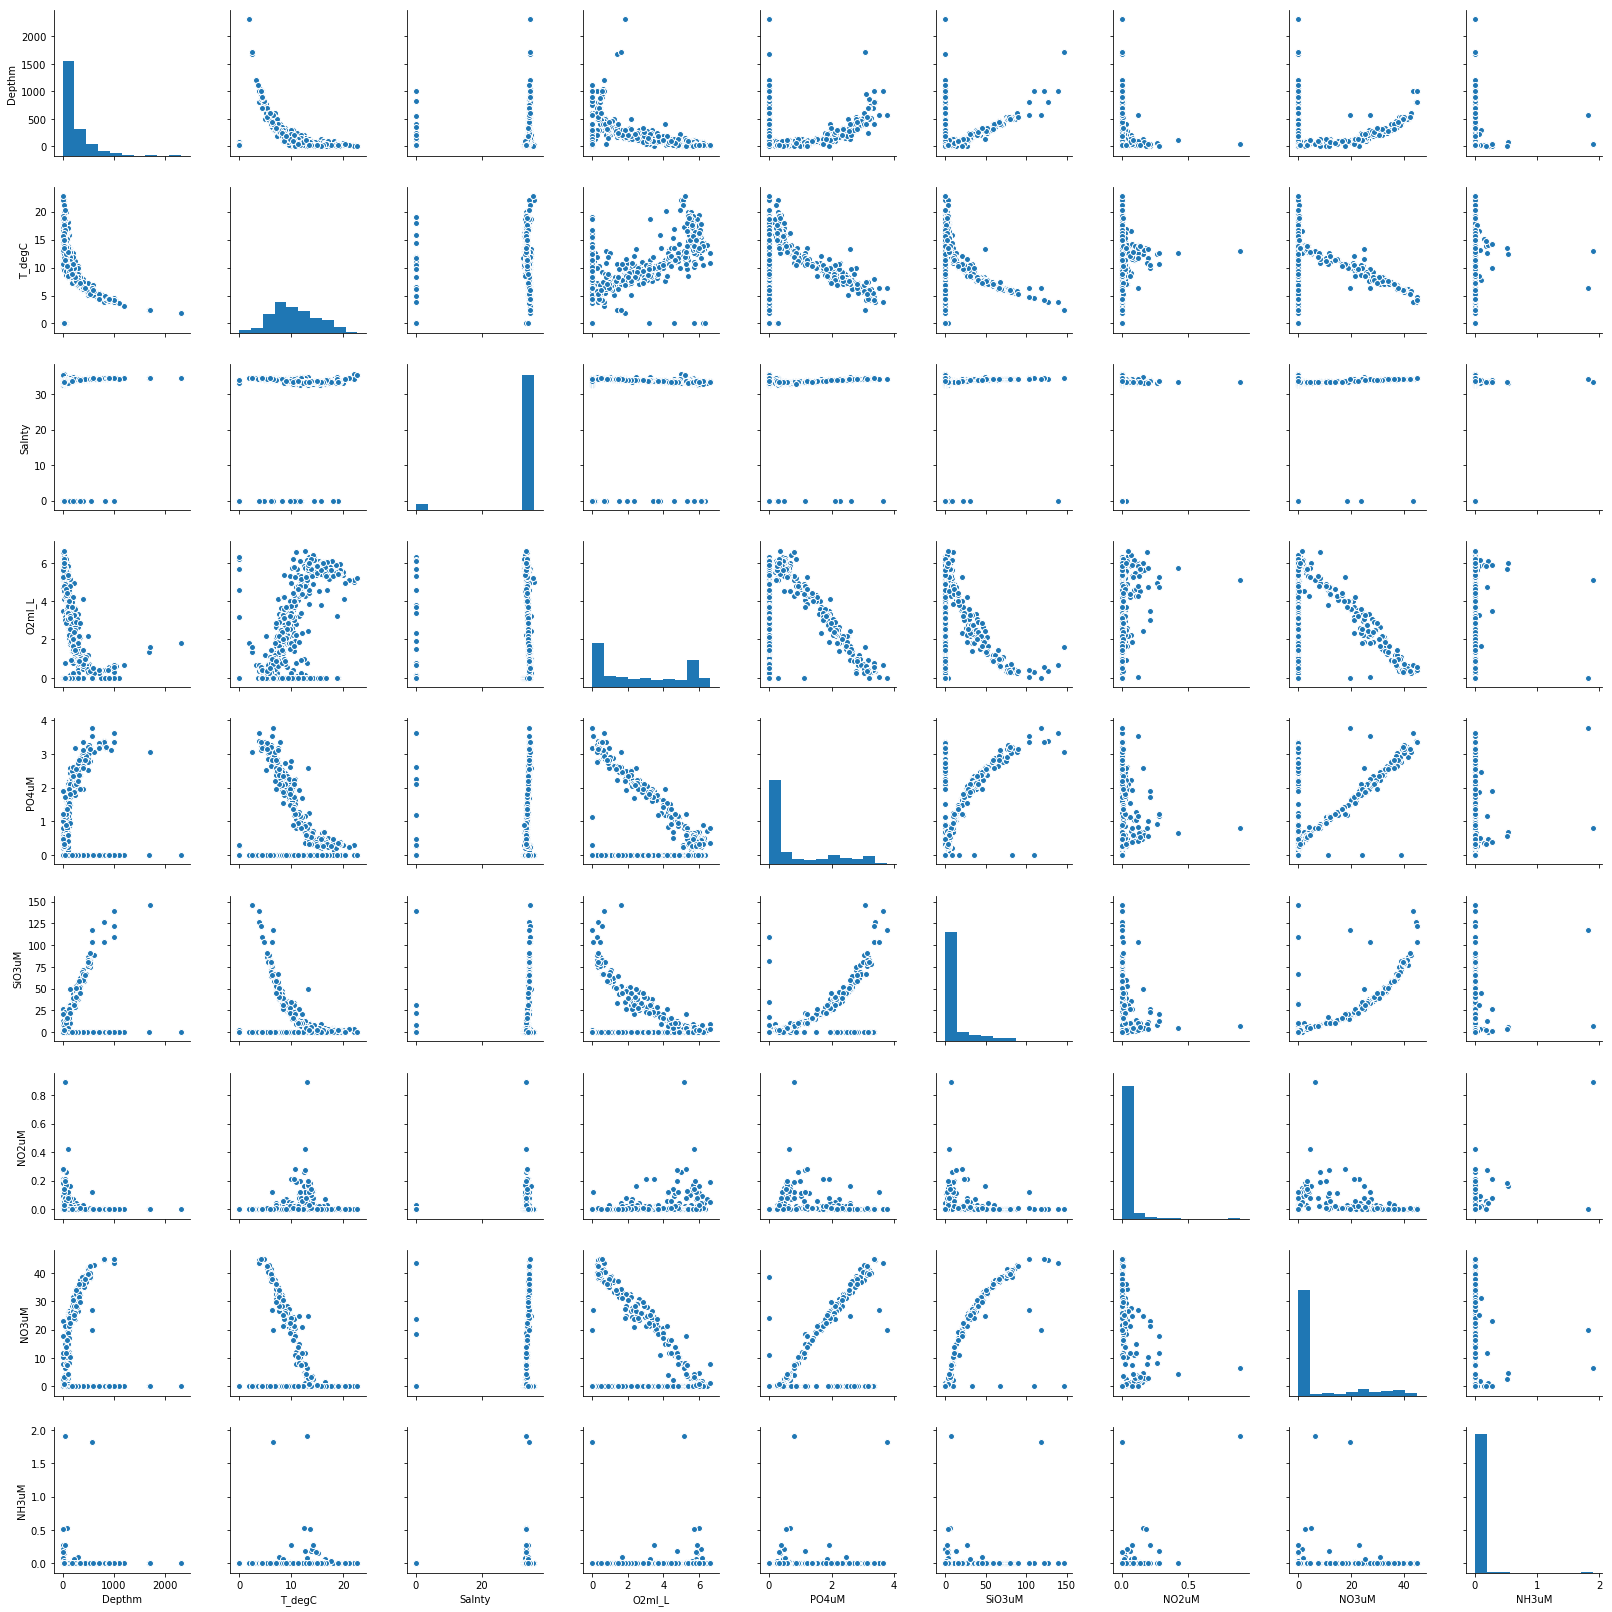

In [4]:

#clean data some more and select best columns to inspect
good_bottle = good_bottle.dropna(axis=1, how='all')
sample_bottle = good_bottle.sample(n=500,random_state=3,axis=0)

fun_cols = ["Depthm", "T_degC", "Salnty", "O2ml_L", "PO4uM", "SiO3uM","NO2uM", "NO3uM", "NH3uM" ]

sample_bottle = good_bottle.sample(n=500,random_state=3,axis=0)
sample_bottle.replace([np.inf, -np.inf], np.nan)
fun_cols = ["Depthm", "T_degC", "Salnty", "O2ml_L", "PO4uM", "SiO3uM","NO2uM", "NO3uM", "NH3uM" ]
sample_bottle = sample_bottle.dropna(axis=1, how='all')


from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imr = imr.fit(sample_bottle)
mean_sample_bottle = pd.DataFrame(imr.transform(sample_bottle),columns=sample_bottle.columns)
#imputed_data

#print(tiny_bottle.shape)
plt.close()
mean_sample_bottle[fun_cols].head()
sns.pairplot(mean_sample_bottle[fun_cols], size=2.5)
plt.tight_layout()
plt.show()

## Sample of T vs S shows initial linear relationship

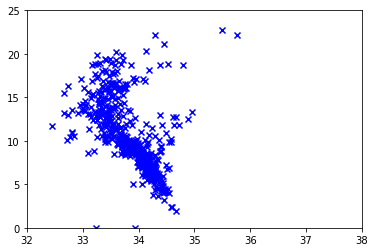

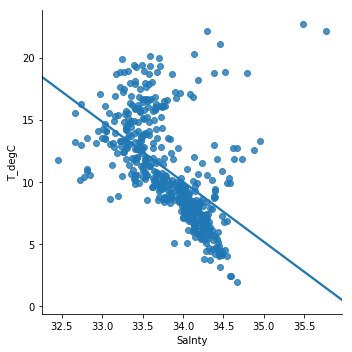

In [5]:

plt.close()
plt.scatter(mean_sample_bottle["Salnty"], mean_sample_bottle["T_degC"],color='blue', marker='x', label='salinity')
plt.axis((32,38,0,25))
plt.xlabel
plt.show()

filter = mean_sample_bottle[(mean_sample_bottle["T_degC"] >0) & (mean_sample_bottle["Salnty"]>0)]

tempdata = filter[["T_degC","Salnty"]]

sns.lmplot(x="Salnty", y="T_degC", data=tempdata,
           order=1, ci=None)
plt.show()

## But linear Regression on the full sample fails spectacularly!

0.25524345186


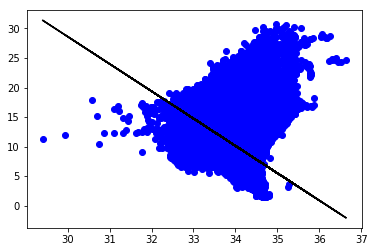

In [6]:
# Set up the training data
filter = bottle[(bottle["T_degC"] >0) & (bottle["Salnty"]>0)]
X = np.array(filter["Salnty"]).reshape(-1,1)
y = np.array(filter["T_degC"]).reshape(-1,1)

#bottle.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

# Make predictions using the new model
plt.close()
y_pred = clf.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()

# Temp vs Salinity scatter plots looks indecipherable
## Possible Problems:
### Temperature readings taken at different times of day
### Temperature readings taken during different seasons
### Temperature readings taken at different depths

<p style=color:'red;'>## Need to add more columns for time of day, time of year</p>

### Depth_ID has the day of the year & time of day, need to parse it out and add new columns


In [ ]:
#Make sure these new columns aren't already present
#Add new columns before filling them with data

bottle = bottle.drop('mins',axis=1)
bottle = bottle.drop('hour',axis=1)
bottle = bottle.drop('day',axis=1)
bottle = bottle.drop('mon',axis=1)
bottle = bottle.drop('year',axis=1)
#print(bottle['mins']);
bottle.insert(4, 'mins', pd.Series(np.zeros(bottle.shape[0]), dtype=np.int32, index=bottle.index))
bottle.insert(4, 'hour', pd.Series(np.zeros(bottle.shape[0]), dtype=np.int32, index=bottle.index))
bottle.insert(4, 'day', pd.Series(np.zeros(bottle.shape[0]), dtype=np.int32, index=bottle.index))
bottle.insert(4, 'mon', pd.Series(np.zeros(bottle.shape[0]), dtype=np.int32, index=bottle.index))
bottle.insert(4, 'year', pd.Series(np.zeros(bottle.shape[0]), dtype=np.int32, index=bottle.index))



In [ ]:
#parse DepthID and add new cols for year,mon,day,hour,mins
#save to Bottle_w_Dates2.csv

import re
from datetime import datetime, date, time,timedelta

count =0;
update = 0

for idx, row in bottle2.iterrows():
    #print (row[3])
    count += 1;
    tmp = divmod(count,10000)
    if (tmp[0]>update):
        print ("Accessing index: ", idx, " ", row[3])
        update +=1;
    
    
    p = re.compile('(\d{2})-(\d{2})(\d{2})\w+-\w+-(\d+)-(\d{1,2})(\d{2})')
    m = p.match(row[3])
    datestr = "";
    
    if(m):
        #print(m.group(0), m.group(1), " ", m.group(2)," ",m.group(3), " ", m.group(4)," ", m.group(5), " ",m.group(6))
        year = int(m.group(1)+m.group(2))
        #mon = int(m.group(3))  #data isn't trustworthy!
        dt = datetime(year, 1,1)+ timedelta(days=(int(m.group(4))-1))
        day = dt.day
        mon = dt.month
        hour = int(m.group(5))
        if(hour > 24): hour = -1
        mins = int(m.group(6))
        if( not 0<= mins <=59): 
            mins=-1;
            #print("mins out of bounds in index:", idx, ": ",row[3])
            #print("year {0:4d} mon:{1:2d} day:{2:2d} hour:{3:2d} min:{4:2d}".format(year,mon,day,hour,mins))

        ''' #uncomment to check if the parsed values make an acceptable date!
        try:
            date = datetime(year,mon,day,hour,mins)
        except ValueError as e:
            print("DateError: year {0:4d} mon:{1:2d} day:{2:2d} hour:{3:2d} min:{4:2d}".format(year,mon,day,hour,mins))
            print("DateError in: ", row[3])
            #print(e)
            continue;
        '''
        
        bottle2.iloc[idx, 4] = year;
        bottle2.iloc[idx, 5] = mon;
        bottle2.iloc[idx, 6] = day;
        bottle2.iloc[idx, 7] = hour
        bottle2.iloc[idx, 8] = mins
        
#bottle2.to_csv('Bottle_w_Dates2.csv', index=False)

 

In [8]:
#reload the data after dates & times were added
bottle = pd.read_csv("Bottle_w_Dates2.csv", encoding="utf-8")
#cast = pd.read_csv("cast.csv")
pd.set_option('display.max_columns', 100)
bottle.head()


C:\Users\gotta\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (52,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,year,mon,day,hour,mins,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,3,1,9,30,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,1949,3,1,9,30,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,1949,3,1,9,30,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,1949,3,1,9,30,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,1949,3,1,9,30,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#get a smaller subset of the Ocean data, only dates from 1960
bottle1960 = bottle[bottle["year"] == 1960]
win_mons = [12,1,2]
sum_mons = [6,7,8]
fall_mons = [9,10,11]
spr_mons = [3,4,5]
bottle1960_spr = bottle1960[ (bottle1960["mon"].isin(spr_mons))]
bottle1960_win = bottle1960[ (bottle1960["mon"].isin(win_mons)) ]
bottle1960_sum = bottle1960[ (bottle1960["mon"].isin(sum_mons))]
bottle1960_fall = bottle1960[ (bottle1960["mon"].isin(fall_mons))]

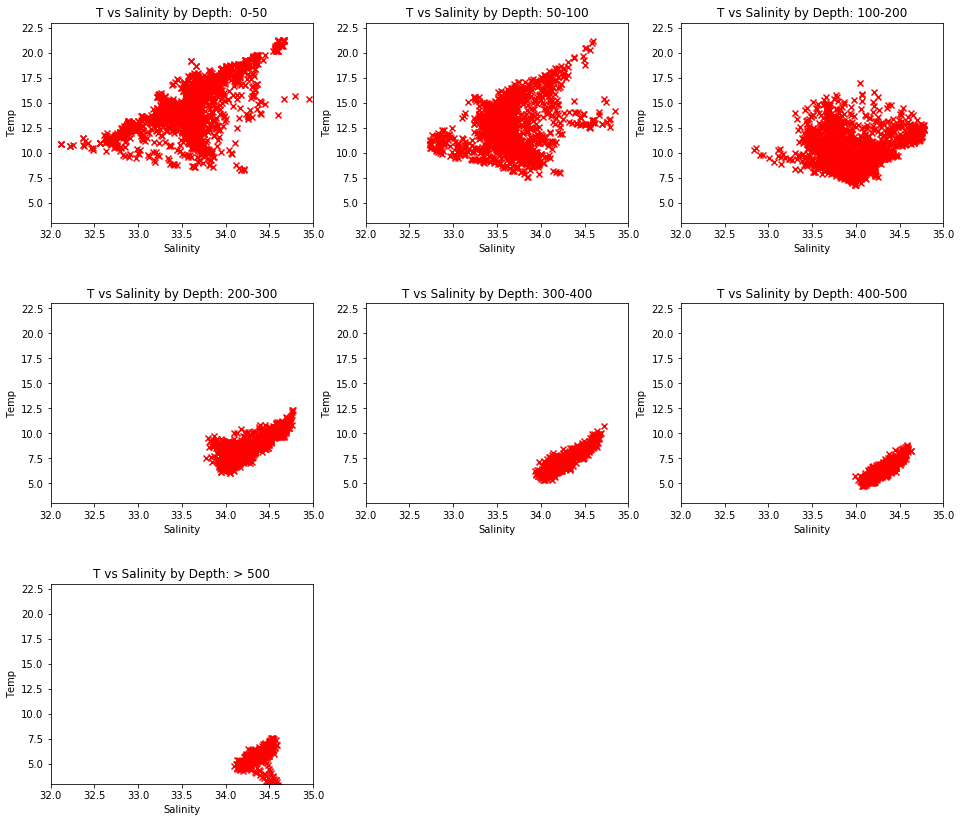

In [41]:
depth_values = [0,50,100,200,300,400,500]

plt.close()
for idx,dist in enumerate(depth_values):
    depth = int(dist);
    depth_range =0;
    plotNum = 331 + idx;
    plt.subplot(plotNum)
    
    
    title_dist = ""
    if(0<= depth <= 50): 
        title_dist = "T vs Salinity by Depth: {0:2d}-{1:2d}".format(depth,depth+50)
        depth_range = depth+50;
    elif (0< depth < 500): 
        title_dist = "T vs Salinity by Depth: {0:3d}-{1:3d}".format(depth,depth+100)
        depth_range = depth+100;
    elif (depth==500): 
        title_dist = "T vs Salinity by Depth: > {0:3d}".format(depth)
        depth_range = depth+ 1000000;
    else:
        title_dist = "Avg T vs Avg Salinity by across all Depths"

        
    plt.scatter(bottle1960_spr.loc[(bottle1960_spr["Depthm"]> depth)&(bottle1960_spr["Depthm"]<= depth_range),'Salnty'], bottle1960_spr.loc[(bottle1960_spr["Depthm"]> depth)&(bottle1960_spr["Depthm"]<= depth_range),'T_degC'],color='r', marker='x', label='temp')
    plt.title(title_dist)
    plt.xlabel("Salinity")
    plt.ylabel("Temp")
    plt.axis((32,35,3,23))
    
    
plt.subplots_adjust(hspace=.4)
#plt.figure(figsize=(30,10))
fig = plt.gcf()
fig.set_size_inches(16, 14)
#fig.savefig('test2png.png', dpi=100)

plt.show()

## Trends in T vs Salinty Data
<img src="T_vs_Sal_byDepth_trends.png">

### The data is indeciperable for low depths
#### This may mean that time of day is a factor or that mean values of Temp, Salinity, & depth may be better to consider instead of raw values

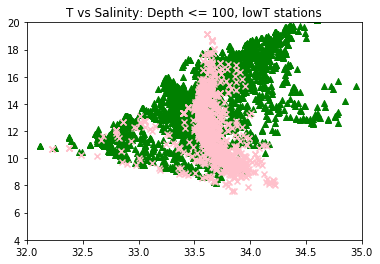

In [49]:
#isolate & remove wrong trending TvsSal Data by removing stations
bottle1960_sprDepth50 =bottle1960_spr[(bottle1960_spr['Depthm']>50)&(bottle1960_spr['Depthm']<=100)]

smallD_bottle1960spr = bottle1960_sprDepth50[(bottle1960_sprDepth50['T_degC']<=11) & (bottle1960_sprDepth50['Salnty']>=33.75)]
smallDhighT_bottle1960spr = bottle1960_sprDepth50[(bottle1960_sprDepth50['Depthm']<=100)&(bottle1960_sprDepth50['T_degC']>=13)]

lowT = pd.unique(smallD_bottle1960spr["Sta_ID"])

highT = pd.unique(smallDhighT_bottle1960spr["Sta_ID"])

#collect all of the station IDs that never get high temp values
onlyInLowTSta50_100 = []
for sta in lowT:
    if(sta not in highT): onlyInLowTSta50_100.append(sta)

        
        
#Depth <= 50m looks linear after eliminating weird (pink) stations
plt.close();
plt.scatter(bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=100),'Salnty'], bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=100),'T_degC'],color='green', marker='^', label='temp')
plt.scatter(bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=100),'Salnty'], bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=100),'T_degC'],color='pink', marker='x', label='temp')

plt.axis([32,35,4,20])

plt.title("T vs Salinity: Depth <= 100, lowT stations")
plt.show()

## This was able to capture some abnormal stations (PINK above) whose measurements don't correspond to a typical T vs S trend evening taking Depth into consideration

## So now 0-100 depth values are linear, but 100-200 are still NOT!

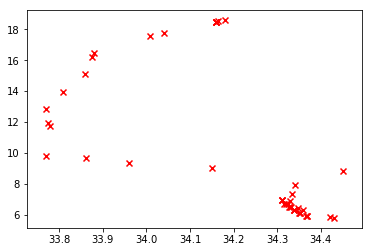

In [67]:
#T_degC Salnty
sta_filter = ["070.0 070.0","040.0 050.0"]
sta_filter1 = ["123.3 080.0"]
bottle1960s_staFilter = bottle1960_spr[(bottle1960_spr["Depthm"] > 1)& (bottle1960_spr["Sta_ID"].isin(sta_filter1))]

plt.scatter(bottle1960s_staFilter['Salnty'], bottle1960s_staFilter['T_degC'],color='red', marker='x', label='temp')
plt.show()


## I took a look at an anomolous station and it shows the weird trend of BOTH a high Temperature and low temperature trend wrt Salinity
 
### This shows up in the larger data set as well, so for now Depths between 100-200 have TWO trendlines
<img src="single_Station_trend-notes.png" width="300" height="300">

## Looking at the raw data below, the initial temp decrease wrt to Salinity is caused by the increase in Depth
## However the 2nd trend occurs because around 200m+ the Salinity begins to INCREASE with an increase in Depth
## NOTE: this only occurs at intermediate depth values ~100-200m, 
## Depths > 200m show a clear (but offset from the 1st) linear trend for T vs Salinity

In [68]:
bottle1960s_staFilter.iloc[:,:]

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,year,mon,day,hour,mins,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
313524,11932,313525,123.3 080.0,19-6004BD-HY-109-0330-12330800-0010A-3,1960,4,18,3,30,10,18.57,34.180,5.00,24.504,93.8,217.959100,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10,18.57,18.57,34.180,24.50,342.3,0.03,5.00,93.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313525,11932,313526,123.3 080.0,19-6004BD-HY-109-0330-12330800-0020A-7,1960,4,18,3,30,20,18.51,34.165,4.91,24.508,92.0,214.035000,NaN,7,2.0,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20,18.51,18.51,34.165,24.50,342.3,0.06,4.91,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313526,11932,313527,123.3 080.0,19-6004BD-HY-109-0330-12330800-0030A-3,1960,4,18,3,30,30,18.48,34.160,4.79,24.512,89.7,208.803200,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,30,18.48,18.47,34.160,24.51,342.3,0.10,4.79,89.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313527,11932,313528,123.3 080.0,19-6004BD-HY-109-0330-12330800-0040A-3,1960,4,18,3,30,40,18.49,34.160,4.75,24.510,88.9,207.060000,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,40,18.49,18.48,34.160,24.51,342.9,0.13,4.75,88.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313528,11932,313529,123.3 080.0,19-6004BD-HY-109-0330-12330800-0050A-7,1960,4,18,3,30,50,18.46,34.160,4.80,24.518,89.8,209.237900,NaN,7,2.0,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,50,18.46,18.45,34.160,24.51,342.5,0.17,4.80,89.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313529,11932,313530,123.3 080.0,19-6004BD-HY-109-0330-12330800-0055A-3,1960,4,18,3,30,55,18.44,34.160,4.86,24.524,90.9,211.852100,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,55,18.44,18.43,34.160,24.52,342.2,0.18,4.86,90.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313530,11932,313531,123.3 080.0,19-6004BD-HY-109-0330-12330800-0071A-3,1960,4,18,3,30,71,17.75,34.040,5.16,24.602,95.2,224.912300,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,71,17.75,17.74,34.040,24.60,335.2,0.24,5.16,95.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313531,11932,313532,123.3 080.0,19-6004BD-HY-109-0330-12330800-0075A-7,1960,4,18,3,30,75,17.56,34.008,5.14,24.623,94.4,224.035900,NaN,7,2.0,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,75,17.56,17.55,34.008,24.62,333.3,0.25,5.14,94.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313532,11932,313533,123.3 080.0,19-6004BD-HY-109-0330-12330800-0095A-3,1960,4,18,3,30,95,16.48,33.880,5.03,24.781,90.4,219.207600,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,95,16.48,16.46,33.880,24.78,318.8,0.32,5.03,9

In [71]:
#isolate low Temp trending stations that never get to high temperature
bottle1960_sprDepth100 =bottle1960_spr[(bottle1960_spr['Depthm']>100)&(bottle1960_spr['Depthm']<=200)]

lowT_D_100_200_bottle1960spr = bottle1960_sprDepth100[(bottle1960_sprDepth100['T_degC']<=10) & (bottle1960_sprDepth100['Salnty']>=33.75)]
highT_D_100_200_bottle1960spr = bottle1960_sprDepth100[(bottle1960_sprDepth100['T_degC']>=13)]

lowT_sta_100_200 = pd.unique(lowT_D_100_200_bottle1960spr["Sta_ID"])

highT_sta_100_200 = pd.unique(highT_D_100_200_bottle1960spr["Sta_ID"])

#collect all of the station IDs that never get high temp values
onlyInLowTSta100_200 = []

for sta in lowT_sta_100_200:
    if(sta not in highT_sta_100_200): onlyInLowTSta100_200.append(sta)

        
#        
#Depth <= 50m looks linear after eliminating weird (pink) stations
#plt.close();
#plt.subplot(121)
#plt.scatter(bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200)&(bottle1960_spr["Depthm"]<=200),'Salnty'], bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200)&(bottle1960_spr["Depthm"]<=200),'T_degC'],color='green', marker='^', label='temp')
#plt.axis([32,35,4,22])
#
#plt.subplot(122)
#plt.scatter(bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200)&(bottle1960_spr["Depthm"]<=100),'Salnty'], bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200)&(bottle1960_spr["Depthm"]<=100),'T_degC'],color='pink', marker='x', label='temp')
#plt.axis([32,35,4,22])
#
#plt.title("T vs Salinity: Depth 100-200, lowT stations")
#plt.show()


## Tried to remove weird low T only trending stations but could not isolated them from the main group, so for now only the low Temp stations at Depths 50-100m will be removed

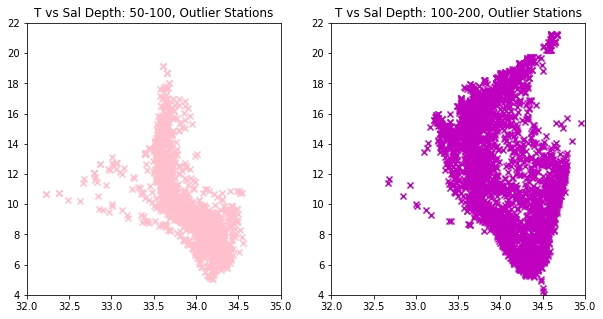

In [73]:
lowTSta = onlyInLowTSta50_100 + onlyInLowTSta100_200

plt.close()
plt.subplot(121)
#plt.scatter(bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=50),'Salnty'], bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=50),'T_degC'],color='c', marker='x', label='temp')
plt.scatter(bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=500),'Salnty'], bottle1960_spr.loc[bottle1960_spr["Sta_ID"].isin(onlyInLowTSta50_100)&(bottle1960_spr["Depthm"]<=500),'T_degC'],color='PINK', marker='x', label='temp')
plt.title("T vs Sal Depth: 50-100, Outlier Stations")
plt.axis([32,35,4,22])

plt.subplot(122)
plt.scatter(bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200),'Salnty'], bottle1960_spr.loc[~bottle1960_spr["Sta_ID"].isin(onlyInLowTSta100_200),'T_degC'],color='m', marker='x', label='temp')
plt.title("T vs Sal Depth: 100-200, Outlier Stations")

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.axis([32,35,4,22])

plt.show()


In [129]:
#Make new dataframe with mean T,Salinity for different depth ranges
bottle1960 = bottle1960.sort_values(['year', 'mon','day'], ascending=[1, 1, 1])

#bottle1960.insert(9, 'mean_Salnty', pd.Series(np.zeros(bottle1960.shape[0]), dtype=np.int32, index=bottle1960.index))
#bottle1960.insert(9, 'mean_Temp', pd.Series(np.zeros(bottle1960.shape[0]), dtype=np.int32, index=bottle1960.index))
old_cols = ["T_degC", "Salnty","Depthm", "hour","mins"]
new_cols  = ['mean_Salnty','mean_T','depthRange']


new_list = bottle1960.columns[~bottle1960.columns.isin(old_cols)]
new_list = new_list.tolist() + new_cols

filtered_bottle1960 = pd.DataFrame(columns=[new_list], dtype='float')

years = pd.unique(bottle1960['year'])
mons = pd.unique(bottle1960['mon'])

for idxY,yr in enumerate(years):
    for idxM,m in enumerate(mons):
        days = pd.unique(bottle1960[ (bottle1960["year"]==yr) & (bottle1960["mon"] == m)]['day'])
        #print(days)
        for idxD, d in enumerate(days):
            day_bottle = bottle1960[(bottle1960["year"]==yr) & (bottle1960["mon"] == m) & (bottle1960["day"] == d)]
            meanV_overall = []
            
            #print(day_bottle[["T_degC", "Salnty"]].mean())
            meanV_overall.append(day_bottle[["T_degC", "Salnty"]].mean()) #[0] depth_range -817
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]<=50) & (day_bottle["Depthm"]>=0) ][["T_degC", "Salnty"]].mean()) #[1] depth_range 0      
            #break;
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=51) & (day_bottle["Depthm"]<=100) ][["T_degC", "Salnty"]].mean())  #[2] depth_range 50
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=101) & (day_bottle["Depthm"]<=200) ][["T_degC", "Salnty"]].mean())  #[3] depth_range 100
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=201) & (day_bottle["Depthm"]<=300) ][["T_degC", "Salnty"]].mean())  #[4] depth_range 200
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=301) & (day_bottle["Depthm"]<=400) ][["T_degC", "Salnty"]].mean())  #[5] depth_range 300
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=401) & (day_bottle["Depthm"]<=500) ][["T_degC", "Salnty"]].mean())  #[6] depth_range 400
            meanV_overall.append(day_bottle[(day_bottle["Depthm"]>=501)  ][["T_degC", "Salnty"]].mean()) #[7] depth_range 500
           
            #bottle1960 = bottle1960.drop('year',axis=1)
            #print(bottle['mins']);
            good_cols = [col for col in bottle1960.columns if col not in old_cols]
            avgDay_bottle1960 = pd.DataFrame(columns=new_list, dtype='float')
            #print(new_list)
            s1 = bottle1960[(bottle1960["year"]==yr)&(bottle1960["mon"]==m)&(bottle1960["day"]==d)][good_cols].iloc[0]
            #print(s1)
            s2 = pd.Series([0, 0, 0], index=['mean_T','mean_Salnty','depthRange'])
            s1.append(s2)
            #print(s1)

            avgDay_bottle1960 = avgDay_bottle1960.append(s1,ignore_index=True)
            #print(avgDay_bottle1960)
            depth_ranges = [-817,0,50,100,200,300,400,500]
            #meanV_ranges = [meanV_overall,meanV_0_50,meanV_51_100,meanV_101_200,meanV_201_300,meanV_301_400,meanV_401_500,meanV_500p]
            
            for depthI, depthV in enumerate(depth_ranges):
                avgDay_bottle1960['mean_T'] =  meanV_overall[depthI][0]
                avgDay_bottle1960['mean_Salnty'] = meanV_overall[depthI][1]
                avgDay_bottle1960['depthRange'] = depth_ranges[depthI]
                filtered_bottle1960 = filtered_bottle1960.append(avgDay_bottle1960,ignore_index=True)
                
    

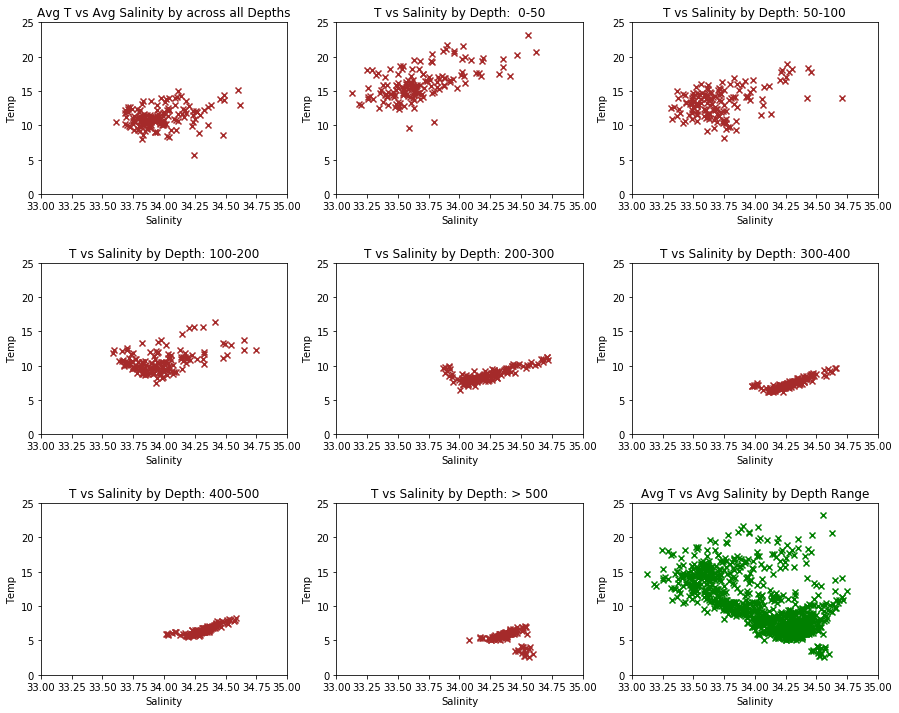

In [84]:
depth_ranges = [-817,0,50,100,200,300,400,500]

plt.close()
for idx,dist in enumerate(depth_ranges):
    depth = int(dist);
    plotNum = 330 + idx+1;
    plt.subplot(plotNum)
    
    #remove lowT stations as well!
    plt.scatter(filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))&(filtered_bottle1960["depthRange"] == depth),'mean_Salnty'], filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))&(filtered_bottle1960["depthRange"] == depth),'mean_T'],color='brown', marker='x', label='temp')
    #plt.scatter(filtered_bottle1960.loc[filtered_bottle1960["depthRange"] == depth,'mean_Salnty'], filtered_bottle1960.loc[filtered_bottle1960["depthRange"] == depth,'mean_T'],color='brown', marker='x', label='temp')

    plt.xlabel("Salinity")
    plt.ylabel("Temp")
    plt.axis((33,35,0,25))
        
    title_dist = ""
    if(0<= depth <= 50): 
        title_dist = "T vs Salinity by Depth: {0:2d}-{1:2d}".format(depth,depth+50)
    elif (0< depth < 500): 
        title_dist = "T vs Salinity by Depth: {0:3d}-{1:3d}".format(depth,depth+100)
    elif (depth==500): 
        title_dist = "T vs Salinity by Depth: > {0:3d}".format(depth)
    
    else:
        title_dist = "Avg T vs Avg Salinity by across all Depths"
        
    plt.title(title_dist)

plt.subplot(339)
plt.scatter(filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))& (filtered_bottle1960["depthRange"] != -817),'mean_Salnty'], filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))&(filtered_bottle1960["depthRange"] != -817),'mean_T'],color='g', marker='x', label='temp')
plt.xlabel("Salinity")
plt.ylabel("Temp")
plt.axis((33,35,0,25))
plt.title("Avg T vs Avg Salinity by Depth Range")        

plt.subplots_adjust(hspace=.4)
#plt.figure(figsize=(30,10))
fig = plt.gcf()
fig.set_size_inches(15, 12)
#fig.savefig('test2png.png', dpi=100)

plt.show()

In [110]:
tst1 = filtered_bottle1960[(filtered_bottle1960["depthRange"] >0) & (filtered_bottle1960["depthRange"] <=50) & ~(filtered_bottle1960['Sta_ID'].isin(onlyInLowTSta50_100))]
#print(tst1.max())
#print(tst1.min())
#tst1 = tst1[["mean_Salnty", "depthRange"]]
tst1.iloc[:,-4:]

,DIC Quality Comment,mean_Salnty,mean_T,depthRange
26,NaN,33.493156,13.735652,50.0
34,NaN,33.599143,12.298571,50.0
58,NaN,33.414600,14.558500,50.0
66,NaN,33.942563,14.196250,50.0
74,NaN,33.962743,13.775915,50.0
82,NaN,33.627968,13.760000,50.0
90,NaN,33.750516,12.946250,50.0
106,NaN,33.683057,12.450857,50.0
114,NaN,33.841288,14.137885,50.0
122,NaN,33.823303,14.214474,50.0


Intercept: 
 [-105.42857629]
Coefficients: 
 [[ 3.52494316  0.        ]]
Intercept: 
 [-1.94534889]
Coefficients: 
 [[ 0.24462056]]


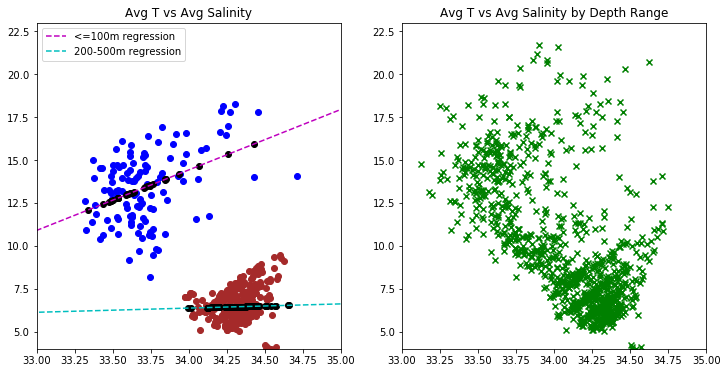

In [184]:
#Perform Linear Regression

from sklearn.preprocessing import PolynomialFeatures
# Set up the training data

filtered_bottle = filtered_bottle1960.replace([np.inf, -np.inf], np.nan)
#filtered_bottle = filtered_bottle1960.dropna(axis=1,how='all')


filterLT100 = filtered_bottle1960[(filtered_bottle1960["depthRange"] >0) & (filtered_bottle1960["depthRange"] <=50) & ~(filtered_bottle1960['Sta_ID'].isin(onlyInLowTSta50_100))]
#filterGT200 = filtered_bottle1960[ (filtered_bottle1960["depthRange"] >= 200) & (filtered_bottle1960["depthRange"] <= 500) & ~(filtered_bottle1960['Sta_ID'].isin(onlyInLowTSta50_100))]
filterGT200 = filtered_bottle1960[  (filtered_bottle1960["depthRange"] >= 300) & ~(filtered_bottle1960['Sta_ID'].isin(onlyInLowTSta50_100))]


#filterGT200 = filterGT200.dropna(axis=1,how='all')
#filter = bottle1960[(bottle1960["T_degC"] >0) & (bottle1960["Salnty"]>0)& (bottle1960['Depthm']<50) ]

#multi-variable Regression for Less Than 100m Depth
X = np.array(filterLT100[["mean_Salnty","depthRange"]].dropna(axis=0,how='any'))
y = np.array(filterLT100["mean_T"].dropna(axis=0,how='any')).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
#print(accuracy)

print('Intercept: \n', clf.intercept_)
print('Coefficients: \n', clf.coef_)

#multi-variable Regression for Greater Than 200m Depth
X1 = np.array(filterGT200["mean_Salnty"].dropna(axis=0,how='any')).reshape(-1,1)
y1 = np.array(filterGT200["mean_T"].dropna(axis=0,how='any')).reshape(-1,1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

lr1 = LinearRegression(normalize=True)
lr1.fit(X1_train, y1_train)
accuracy = lr1.score(X1_test, y1_test)
#print(accuracy)

print('Intercept: \n', lr1.intercept_)
print('Coefficients: \n', lr1.coef_)



# Make predictions using the new model
plt.close()
y_pred = clf.predict(X_test)
y1_pred = lr1.predict(X1_test)

x_line = np.linspace(32,35,200)
y_lr = np.zeros(x_line.shape[0])

for x_idx, x_pt in enumerate(x_line):
    y_lr[x_idx] = clf.intercept_
    for j_idx,reg_c in enumerate(clf.coef_[0]):
        y_lr[x_idx] += reg_c*x_pt

y_lr1 = np.zeros(x_line.shape[0])

for x_idx, x_pt in enumerate(x_line):
    y_lr1[x_idx] = lr1.intercept_
    for j_idx,reg_c in enumerate(lr1.coef_[0]):
        y_lr1[x_idx] += reg_c*x_pt

        
plt.subplot(121)
plt.scatter(X_train[:,0], y_train, color='b')
plt.scatter(X_test[:,0], y_pred, color='k')
plt.plot(x_line, y_lr, color='m', linestyle="--", label="<=100m regression")
#plt.axis([32,35,4,23])


#plt.subplot(122)
plt.scatter(X1_train[:,0], y1_train, color='brown')
plt.scatter(X1_test[:,0], y1_pred, color='k')
plt.plot(x_line, y_lr1, color='c', linestyle="--",label="200-500m regression")
plt.axis([33,35,4,23])
plt.legend(loc='upper left')
plt.title("Avg T vs Avg Salinity")


plt.subplot(122)
plt.scatter(filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))& (filtered_bottle1960["depthRange"] != -817),'mean_Salnty'], filtered_bottle1960.loc[~(filtered_bottle1960["Sta_ID"].isin(onlyInLowTSta50_100))&(filtered_bottle1960["depthRange"] != -817),'mean_T'],color='g', marker='x', label='temp')
plt.axis([33,35,4,23])
plt.title("Avg T vs Avg Salinity by Depth Range")

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

# 1st order Linear Regression of Temp vs Salinity Ocean Data (1960 only!)
### shows to several trends:
#### 1) a low Depth (<=100m) trendline (blue)
#### 2) a high Depth (>200m) trendline (brown)
#### 3) Transistion between low & high Depth is a not plotted but would clearly have a negative slope! This transition slope is not yet understood but could be measurement error